In [1]:
import numpy as np

from astropy.io.votable import parse
from astropy.io import ascii
from astropy.time import Time

import matplotlib.pyplot as plt
import matplotlib as mpl

label_size=14
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
%matplotlib inline

folder = "C:/Users/Me/Documents/J1407_code/photometry/"

In [35]:
### Read in data from...

# ... PROMPT:
file = open(folder + 'PROMPT/PROMPT_J1407.dat')
body = file.readlines()[1:]
light_P = np.zeros((len(body), 3))
for (i, entry) in enumerate(body):
    words = entry.split()
    t = Time(float(words[0]), format='mjd', scale='utc')
    light_P[i] = t.mjd, float(words[2]), float(words[3])
print ("Data from PROMPT: %d" % len(light_P))

# ... Sonneberg:
body = ascii.read(folder + "Sonneberg/sonneberg.txt")
light_SO = np.zeros((len(body), 3))
for i, plate in enumerate(body):
    time_d = str(float(plate[0])*10**4 + float(plate[1])*10**2 + float(plate[2]))[:-2]
    time_m = time_d[:4] + '-' + time_d[4:] 
    time_y = time_m[:7] + '-' + time_m[7:]
    t = Time(time_y, format="iso", scale = 'utc')
    light_SO[i] = t.mjd, float(plate[3]), 0.3
print ("Data from Sonneberg Observatory: %d" % len(light_SO))

# ... AAVSO:
file = open(folder + 'AAVSO/aavsodata_J_2017_11_11.txt', 'r')
body = file.readlines()[1:]
light_AA = np.zeros((len(body), 3))
for (i, line) in enumerate(body):
    words = line.split()
    t = Time(float(words[0]), format='jd', scale='utc')
    light_AA[i] = t.mjd, float(words[1]), float(words[2])
print ("Data from AAVSO: %d" % len(light_AA))
            
# ... SuperWASP:
mean_sw = 12.36
file = open(folder + 'SuperWASP/1SWASP_J140747.93-394542.6_lc.txt', 'r')
body = file.readlines()[22:]
light_SW = np.zeros((len(body), 3))
for (i, line) in enumerate(body):
    words = line.split()
    t = Time(float(words[9]), format='jd', scale='utc')
    light_SW[i] = t.mjd, float(words[10]), float(words[11])
print ("Data from SuperWASP: %d" % len(light_SW))

# ... KELT:
file = open(folder + 'KELT/KS25C041156_J1406_TFA.txt')
body = file.readlines()[1:]
kelt_correction = 2.471
light_K = np.zeros((len(body), 3))
for (i, line) in enumerate(text):
    words = line.split()
    t = Time(float(words[0]), format='jd', scale='utc')
    light_K[i] = t.mjd, float(words[1]) - kelt_correction, float(words[2])
print  ("Data from KELT: %d" % len(light_K))

# ... DASCH:
pre_Dasch = parse(folder + 'DASCH/plotshort_APASS_J140747.9-394543.xml') #.gz')
table_Dasch = pre_Dasch.get_first_table()
light_D = np.zeros((len([x for x in table_Dasch.array if (str(x[9])[2:5] != "dsr") & ((str(x[9])[2:5] != "dsy"))]), 3))
i = 0
for x in table_Dasch.array:
    if (str(x[9])[2:5] != "dsr") & ((str(x[9])[2:5] != "dsy")):
        t = Time(x[0], format='jd', scale='utc')
        light_D[i] = t.mjd, float(x[2]), float(x[3])
        i+=1
print ("Data from DASCH DR5 in J-Blue: " + str(len(light_D)))

# ... Bamberg Observatory:
body = open(folder + 'Bamberg/J1407_results-bamberg.txt', "r").readlines()[1:]
i = 0
for line in body:
    words = line.split()
    if (words[-5] != "nan") & (float(words[-8])-0.2>float(words[-7])):
        i += 1
light_B = np.zeros((i, 3))
i = 0
for line in body:
    words = line.split()
    # ignore observations that are 0.2 mag away from the respective plate limit:
    if (words[-5] != "nan") & (float(words[-8]) - 0.2 > float(words[-7])):
        t = Time(float(words[11]), format='jd', scale='utc')
        light_B[i] = t.mjd, float(words[-5]), float(words[-4])
        i+=1
print ("Data from Bamberg in Johnson Blue: " + str(len(light_B)))

Data from PROMPT: 2013
Data from Sonneberg Observatory: 103


Data from AAVSO: 4243
Data from SuperWASP: 28918
Data from KELT: 5534


Data from DASCH DR5 in J-Blue: 584
Data from Bamberg in Johnson Blue: 109


<function matplotlib.pyplot.close>

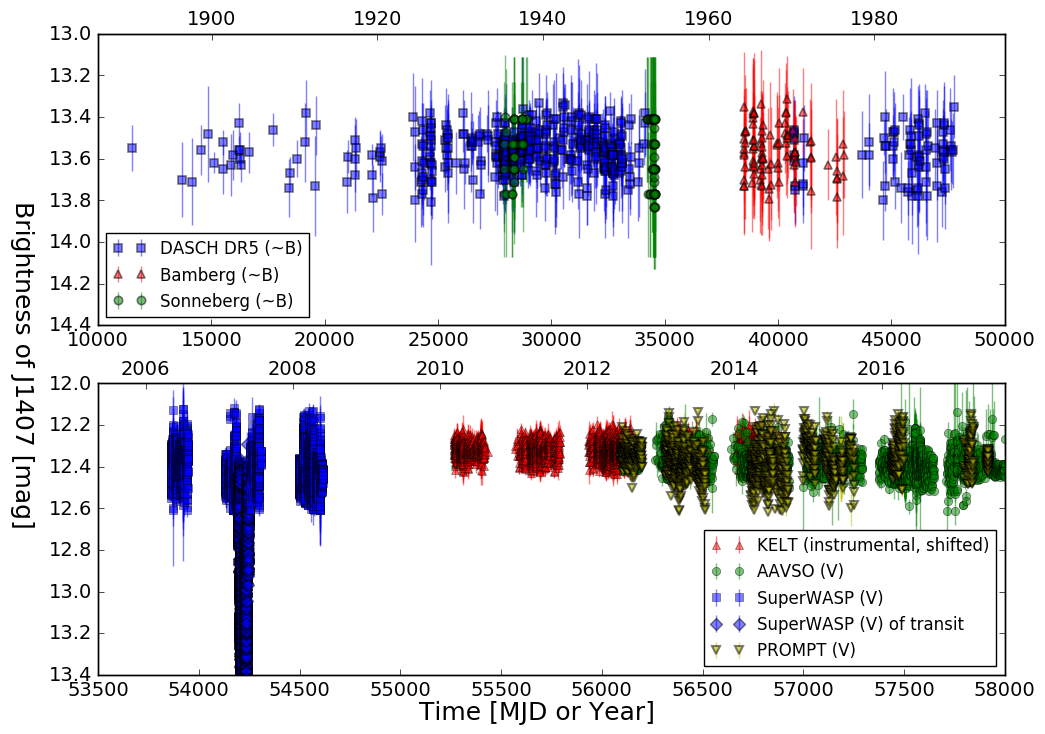

In [40]:
# Approximate time of the begin and end of the transit
t_begin = 54192
t_end = 54248

lower_x1 = 10000
low_x1 = Time(lower_x1,format='mjd',scale='utc').decimalyear
higher_x1 = 50000
high_x1 = Time(higher_x1, format='mjd', scale='utc').decimalyear

lower_x2 = 53500
low_x2 = Time(lower_x2, format='mjd', scale='utc').decimalyear
higher_x2 = 58000
high_x2 = Time(higher_x2,format='mjd',scale='utc').decimalyear

fig = plt.figure(figsize=(11.7,8.27))

ax11 = fig.add_subplot(211)
ax12 = ax11.twiny()
ax21 = fig.add_subplot(212)
ax22 = ax21.twiny()


source = light_D
data = source[(source[:,2]<=0.3) & (abs(source[:,1]-np.mean(source[:,1]))<0.25)]
ax11.errorbar(data[:,0], data[:,1], data[:,2],c="b", ms=6, mec="k", mew=1.2, fmt="s", ls="none", alpha=0.5, capsize=0, label="DASCH DR5 (~B)")

source = light_B
data = source[(source[:,2]<=0.3) & (abs(source[:,1]-np.mean(source[:,1]))<0.25)]
ax11.errorbar(data[:,0], data[:,1], data[:,2], c="r", ms=6, mec="k", mew=1.2, fmt="^", ls="none", alpha=0.5, capsize=0, label="Bamberg (~B)")

source = light_SO
data = source[(source[:,2]<=0.3) & (abs(source[:,1]-np.mean(source[:,1]))<0.25)]
ax11.errorbar(data[:,0], data[:,1], data[:,2], c="g", ms=6, mec="k", mew=1.2, fmt="o", ls="none", alpha=0.5, capsize=0, label="Sonneberg (~B)")

source = light_K
data = source[(source[:,2]<=0.3) & (abs(source[:,1]-np.mean(source[:,1]))<0.25)]
ax21.errorbar(data[:,0], data[:,1], data[:,2], c="r", ms=6, mec="k", mew=0.5, fmt="^", ls="none", alpha=0.5, capsize=0, label="KELT (instrumental, shifted)")

source = light_AA
data = source[(source[:,2]<=0.3) & (abs(source[:,1]-np.mean(source[:,1]))<0.25)]
ax21.errorbar(data[:,0], data[:,1], data[:,2], c="g", ms=6, mec="k", mew=0.5, fmt="o", ls="none", alpha=0.5, capsize=0, label="AAVSO (V)")

source = light_SW
data = source[(source[:,0]<t_begin) & (source[:,2]<=0.3) & (abs(source[:,1]-mean_sw)<0.25)]
ax21.errorbar(data[:,0], data[:,1], data[:,2], c="b", ms=6, mec="k", mew=0.5, fmt="s", ls="none", alpha=0.5, capsize=0, label="SuperWASP (V)")
data = source[(t_begin<source[:,0]) & (source[:,0]<t_end) & (source[:,2]<=0.3) & (source[:,1]>12.27)]
ax21.errorbar(data[:,0], data[:,1], data[:,2], c="b", ms=6, mec="k", mew=1.0, fmt="D", ls="none", alpha=0.5, capsize=0, label="SuperWASP (V) of transit")
data = source[(source[:,0]>t_end) & (source[:,2]<=0.3) & (abs(source[:,1]-mean_sw)<0.25)]
ax21.errorbar(data[:,0], data[:,1], data[:,2], c="b", ms=6, mec="k", mew=0.5, fmt="s", ls="none", alpha=0.5, capsize=0)

source = light_P
data = source[(source[:,2]<=0.3) & (abs(source[:,1]-np.mean(source[:,1]))<0.25)]
ax21.errorbar(data[:,0], data[:,1], data[:,2], c="y", ms=6, mec="k", mew=1.5, fmt="v", ls="none", alpha=0.5, capsize=0, label="PROMPT (V)")

ax11.set_ylim([14.4,13.])
ax21.set_ylim([13.4,12.])

ax11.set_xlim([lower_x1,higher_x1])
ax12.set_xlim([low_x1,high_x1])
ax21.set_xlim([lower_x2,higher_x2])
ax22.set_xlim([low_x2,high_x2])

fig.text(0.06, 0.5,'Brightness of J1407 [mag]', ha='center', va='center', rotation=270, fontsize =18)
fig.text(0.5, 0.08,'Time [MJD or Year]', ha='center', va='center', fontsize =18)

ax11.invert_yaxis()
ax21.invert_yaxis()
ax12.invert_yaxis()
ax22.invert_yaxis()

ax11.legend(loc=0)
ax21.legend(loc=4)

# plt.savefig(folder + "figure_2/figure_2.pdf")
plt.savefig(folder + "figure_2/figure_2.png")
plt.close